In [1]:
import numpy as np
import matplotlib.pyplot as plt

def random_data(datatype ="xor"):
    data=[[0,0],[1,0],[0,1],[1,1]]
    if datatype=="xor":
        return (np.array(data),np.array([int(a[0] ^ a[1]) for a in data]) )
    elif datatype=="and":
        return (np.array(data),np.array([int(a[0] and a[1]) for a in data]) )
    elif datatype=="or":
        return (np.array(data),np.array([int(a[0] or a[1]) for a in data]) )
    elif datatype=="nand":
        return (np.array(data),1-np.array([int(a[0] and a[1]) for a in data]))
    elif datatype=="nor":
        return (np.array(data),1-np.array([int(a[0] or a[1]) for a in data]))
    
    
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
def sigmoidprime(x):
    return np.exp(x)/((np.exp(x)+1)**2)

def squared_error(x,y):
    return (x-y)**2

In [2]:
class Our_Mlp():
    def __init__(self,number_of_h_ls=1):
        
        self.n_h_ls=number_of_h_ls
        self.h_ls_values = np.zeros((4,number_of_h_ls))
        self.h_ls_weights = np.random.normal(-5,5,(4,number_of_h_ls,4))
        self.h_ls_weights[:,0,2:4]=np.nan # first layer has only two inputs -> set other weights to nan
        self.h_ls_alpha =  np.ones((4,number_of_h_ls)) # we set the learning_rate to one
        self.h_ls_biases =  np.random.normal(-5,5,(4,number_of_h_ls))
        
        
        # We will store the drives of the perceptrons for the backprob
        
        self.h_ls_drives = np.zeros((4,number_of_h_ls))
        
        self.h_ls_deltas  = np.zeros((4,number_of_h_ls))
        
        
        # No we define the value, weights, bias, learning rate of our output neuron
        
        self.o_v=0
        self.o_w=np.random.normal(-5,5,4)
        self.o_b=float(np.random.normal(-5,5,1))
        self.o_alpha=1
        self.o_delta = 0
        self.o_drive = 0
        
        
    def forward_step(self,input_data):
        """
        input_data is supposed to an 1d numpy.array with shape=(2)
        """
        
        # So now we have to calculate the input for the perceptrons of the first hidden layer which get 2 inputs each
        for y in range(0,4):
            
            self.h_ls_drives[y,0]=np.dot(self.h_ls_weights[y,0,0:2],input_data) + self.h_ls_biases[y,0]

            self.h_ls_values[y,0]=sigmoid(self.h_ls_drives[y,0])
            
        # Calculate the next hidden layers
            
        for x in range(1,self.n_h_ls):
            for y in range(0,4):
                self.h_ls_drives[y,x]=np.dot(self.h_ls_weights[y,x,:],self.h_ls_values[:,x-1]) + self.h_ls_biases[y,x]
                self.h_ls_values[y,x]=sigmoid(self.h_ls_drives[y,x])
        
        # Last layer to output neuron
        self.o_drive= np.dot(self.o_w,self.h_ls_values[:,-1]) + self.o_b
        
        self.o_v= sigmoid(self.o_drive)
        
        # let's return the output
        
        return self.o_v
    
    
    
    def backprop_step(self,solution):
        
        self.o_delta = 2*(self.o_v-solution)* sigmoidprime(self.o_drive)
        
        # update the weitghs
        
        self.o_w -= self.o_alpha* self.o_w * self.o_delta
        
        # update the bias
        
        self.o_b -=  self.o_alpha * self.o_delta
        
        # now for the neurons of the last hidden layer
        for y in range(0,4):
            self.h_ls_deltas[y,-1] = sigmoidprime(self.h_ls_drives[y,-1]) * self.o_w[y] * self.o_delta
            self.h_ls_weights[y,-1,:] -=  self.h_ls_weights[y,-1,:]  * self.h_ls_alpha[y,-1] * self.h_ls_deltas[y,-1]
            self.h_ls_biases[y,-1] -=  self.h_ls_alpha[y,-1] * self.h_ls_deltas[y,-1]
            
        # for the rest of the hidden layer
        
        for x in range(self.n_h_ls-2,-1,-1):
            for y in range(0,4):
                
                self.h_ls_deltas[y,x] = np.dot(self.h_ls_deltas[:,x+1],self.h_ls_weights[:,x+1,y]) * sigmoidprime(self.h_ls_drives[y,x])
                self.h_ls_weights[y,x,:] -= self.h_ls_weights[y,x,:] * self.h_ls_alpha[y,x] * self.h_ls_deltas[y,x]
                self.h_ls_biases[y,x]-= self.h_ls_alpha[y,x] * self.h_ls_deltas[y,x]
                
    def __str__(self):
        text = f"""This is a neuronal network with {self.n_h_ls} hidden layers.
The values are:
{self.h_ls_values}

{ self.o_v }

The weights are:
{self.h_ls_weights}

{ self.o_w }

The biases are:

{self.h_ls_biases}

{self.o_b}

The deltas are:
{self.h_ls_deltas}

{ self.o_delta }"""
        return text
        
        
        

In [3]:
a = Our_Mlp(2)
print(a)

This is a neuronal network with 2 hidden layers.
The values are:
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]

0

The weights are:
[[[-12.91094728  -1.03314306          nan          nan]
  [ -7.78870969  -3.21795969   4.64209786  -7.07869367]]

 [[ -5.13025436   1.51766736          nan          nan]
  [ -2.79773041  -7.45897045  -6.49155131  -5.87398766]]

 [[ -0.03649703  -9.65253198          nan          nan]
  [-10.5947063   -3.80152139  -8.41497679  -0.81142178]]

 [[ -5.79357087  -6.8258              nan          nan]
  [ -9.07628447  -9.93371717 -14.11426196  -4.19971483]]]

[-12.12824406  -6.98467981   3.51023897  -2.06589874]

The biases are:

[[-1.96474972 -2.07411436]
 [-2.45654705  2.36004628]
 [-3.52201358 -6.2518209 ]
 [-7.60353177 -4.26862873]]

-16.8631907933523

The deltas are:
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]

0


In [4]:
data = random_data()
data

(array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([0, 1, 1, 0]))

In [5]:
def tick(MLP,data):
    input_values, solution = data
    
    assert(input_values.shape[0]==solution.size)
    
    accuracy_of_loss = 0
    
    for i, input_value in enumerate(input_values):
        accuracy_of_loss+= squared_error(MLP.forward_step(input_value),solution[i]) < 0.5
        MLP.backprop_step(solution[i])
        
    return accuracy_of_loss/4

In [6]:
tick(a,data)
print(a)

This is a neuronal network with 2 hidden layers.
The values are:
[[1.23275987e-07 1.10904679e-01]
 [2.30783698e-03 9.12361825e-01]
 [1.83027482e-06 1.90643713e-03]
 [1.64932018e-09 1.34985692e-02]]

2.067657581491791e-11

The weights are:
[[[-12.91094729  -1.03314306          nan          nan]
  [ -7.78870968  -3.21795969   4.64209786  -7.07869367]]

 [[ -5.13025438   1.51766736          nan          nan]
  [ -2.7977304   -7.45897043  -6.49155129  -5.87398764]]

 [[ -0.03649703  -9.65253198          nan          nan]
  [-10.5947063   -3.80152139  -8.41497679  -0.81142178]]

 [[ -5.79357087  -6.8258              nan          nan]
  [ -9.07628447  -9.93371717 -14.11426196  -4.19971483]]]

[-12.12824408  -6.98467982   3.51023898  -2.06589875]

The biases are:

[[-1.96474972 -2.07411437]
 [-2.45654704  2.36004628]
 [-3.52201358 -6.2518209 ]
 [-7.60353177 -4.26862873]]

-16.863190791787467

The deltas are:
[[ 1.16536379e-27 -1.02254718e-21]
 [ 1.62656244e-23 -4.77522860e-22]
 [-2.49458147e-

In [7]:
erg=[]
weights_of_first_neuron = [[],[],[],[]]

x_axes= np.linspace(0,10000,num=100001)
for i in range(0,len(x_axes)):
    erg.append(tick(a,data))
    if i % 100 == 0:
        for z in range(0,4):
            weights_of_first_neuron[z].append(a.h_ls_weights[0,1,z])
    

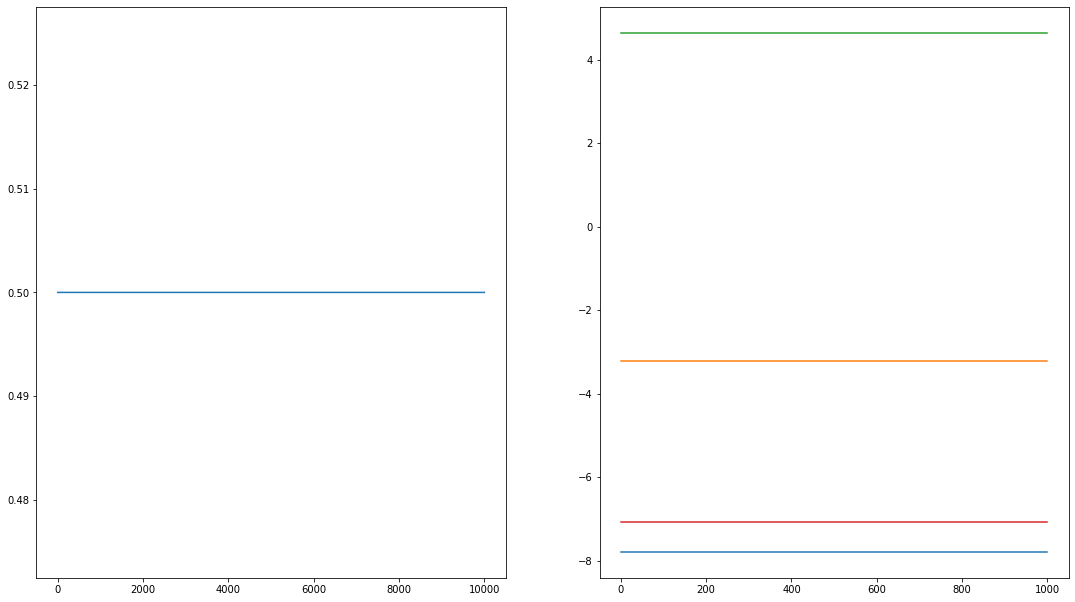

In [8]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18.5, 10.5)
ax[0].plot(x_axes,erg)

ax[1].plot(range(0,len(weights_of_first_neuron[0])) , weights_of_first_neuron[0])
ax[1].plot(range(0,len(weights_of_first_neuron[0])) , weights_of_first_neuron[1])
ax[1].plot(range(0,len(weights_of_first_neuron[0])) , weights_of_first_neuron[2])
ax[1].plot(range(0,len(weights_of_first_neuron[0])) , weights_of_first_neuron[3])

In [9]:
print(a)

This is a neuronal network with 2 hidden layers.
The values are:
[[1.23188237e-07 1.10899073e-01]
 [2.30518969e-03 9.12342331e-01]
 [1.83027773e-06 1.90645673e-03]
 [1.64932016e-09 1.34989161e-02]]

2.0658963494609563e-11

The weights are:
[[[-12.91165754  -1.0331999           nan          nan]
  [ -7.7881967   -3.21774775   4.64179212  -7.07822745]]

 [[ -5.13251319   1.51833558          nan          nan]
  [ -2.79698033  -7.45697068  -6.48981091  -5.87241282]]

 [[ -0.03649703  -9.65253022          nan          nan]
  [-10.59470879  -3.80152228  -8.41497877  -0.81142197]]

 [[ -5.79357088  -6.82580001          nan          nan]
  [ -9.07628221  -9.93371469 -14.11425844  -4.19971378]]]

[-12.13014406  -6.98577402   3.51078888  -2.06622238]

The biases are:

[[-1.96469471 -2.07418023]
 [-2.45610685  2.35977814]
 [-3.52201376 -6.25182066]
 [-7.60353177 -4.26862897]]

-16.863034146810627

The deltas are:
[[ 1.16261502e-27 -1.02092065e-21]
 [ 1.62205159e-23 -4.76880242e-22]
 [-2.49013826e